In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Data Exploration

In [2]:
df=pd.read_excel("D:\Coderscave\Diabetes prediction\diabetes_prediction_dataset.xlsx")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int32  
 1   age                  96146 non-null  int32  
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int32  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 6.2 MB


In [56]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.783756,0.077601,0.040803,2.231159,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.482208,0.267544,0.197833,1.879963,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,4.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


# Data Wrangling

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [54]:
df["age"]=df["age"].astype("int")

In [9]:
df.drop_duplicates(inplace=True)

In [57]:
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96141,0,36,0,0,0,24.60,4.8,145,0
96142,0,2,0,0,0,17.37,6.5,100,0
96143,1,66,0,0,3,27.83,5.7,155,0
96144,0,24,0,0,4,35.42,4.0,100,0


# Descriptive Statistic Analysis

In [11]:
cat_col=["gender","hypertension","heart_disease","diabetes"]

In [12]:
for i in cat_col:
    x=df[i].value_counts()
    print(x)

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64
0    88685
1     7461
Name: hypertension, dtype: int64
0    92223
1     3923
Name: heart_disease, dtype: int64
0    87664
1     8482
Name: diabetes, dtype: int64


# Pearson Method

In [13]:
from scipy import stats

In [14]:
def pearson(Predictor,Target="diabetes"):
    p_coeff,p_val=stats.pearsonr(df[Predictor],df[Target])
    print("For",Predictor," : PearsonCoefficient:",p_coeff,", p_value:",p_val)

In [15]:
num_col=["bmi","HbA1c_level","blood_glucose_level"]

In [16]:
for i in num_col:
    pearson(i)

For bmi  : PearsonCoefficient: 0.2149316999588771 , p_value: 0.0
For HbA1c_level  : PearsonCoefficient: 0.4064083758294865 , p_value: 0.0
For blood_glucose_level  : PearsonCoefficient: 0.4243358355790676 , p_value: 0.0


In [17]:
p_coeff,p_val=stats.pearsonr(df["bmi"],df["diabetes"])
print(p_coeff,p_val)

0.2149316999588771 0.0


<Axes: >

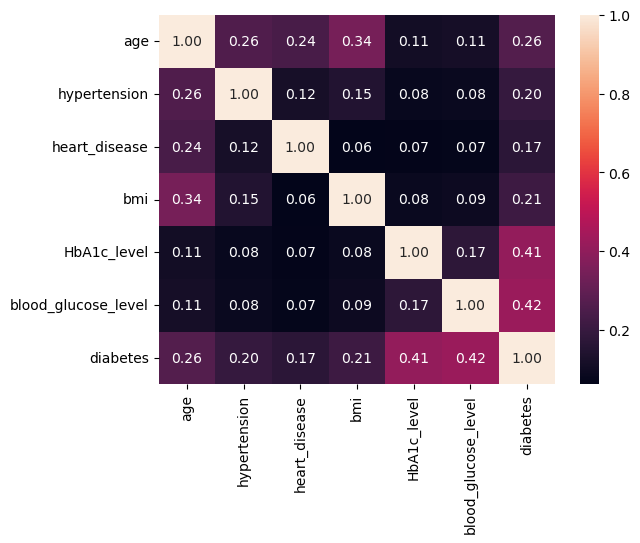

In [18]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")

# ANOVA

In [19]:
gp1=df[["gender","diabetes"]].groupby(["gender"])
f_val,p_val=stats.f_oneway(gp1.get_group("Male")["diabetes"],gp1.get_group("Female")["diabetes"],
                            gp1.get_group("Other")["diabetes"])
print("ANOVA Results : ","F_val:",f_val,", P_val:",p_val)

ANOVA Results :  F_val: 69.7915710615839 , P_val: 5.150946750141422e-31


In [20]:
gp2=df[["hypertension","diabetes"]].groupby(["hypertension"])
f_val,p_val=stats.f_oneway(gp2.get_group(0)["diabetes"],gp2.get_group(1)["diabetes"])
print("ANOVA Results : ","F_val:",f_val,", P_val:",p_val)

ANOVA Results :  F_val: 3829.202325487801 , P_val: 0.0


In [21]:
gp3=df[["heart_disease","diabetes"]].groupby(["heart_disease"])
f_val,p_val=stats.f_oneway(gp3.get_group(0)["diabetes"],gp3.get_group(1)["diabetes"])
print("Anova Results : ","f_val: ",f_val,"p_val: ",p_val)

Anova Results :  f_val:  2885.9517065620144 p_val:  0.0


# Algorithms

#### Since it is for predicting "categorical Variable", So,we should not use "Linear Regression". 

### Label Encoding

In [22]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df["gender"]=label_encoder.fit_transform(df["gender"])
df["gender"].unique()

array([0, 1, 2])

In [23]:
df["smoking_history"]=label_encoder.fit_transform(df["smoking_history"])
df["smoking_history"].unique()

array([4, 0, 1, 3, 2, 5])

In [24]:
x=df.drop(columns=["diabetes"])

In [25]:
y=df["diabetes"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logm=LogisticRegression()

In [30]:
logm.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred1=logm.predict(x_test)
accuracy=accuracy_score(y_test,y_pred1)
accuracy

0.9534810425793439

In [32]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     28932
           1       0.82      0.60      0.69      2797

    accuracy                           0.95     31729
   macro avg       0.89      0.79      0.83     31729
weighted avg       0.95      0.95      0.95     31729



In [33]:
logm.score(x_test,y_test)

0.9534810425793439

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree=DecisionTreeClassifier()

In [36]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
dtree.score(x_test,y_test)

0.9501402502442561

### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [39]:
rfc.score(x_test,y_test)

0.9687982602666331

### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier(n_neighbors=10)

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [43]:
knn.score(x_test,y_test)

0.9506760376942229

### SVM

In [48]:
from sklearn.svm import SVC

In [49]:
svm=SVC()

In [50]:
svm.fit(x_train,y_train)

SVC()

In [51]:
svm.score(x_test,y_test)

0.946137602823915

### From the above algorithms "Random forest classifier" provides the highest score--0.9687.